## What are the expectations from this code?

1. Import the data
2. Remove all the records that are not tagged to any lables (just to make the computation small and quick for this POC)
--------------

3. Take 
> dependent features (Y) - "toxic", "severe_toxic", "insult", "obscene", "threat",
"identiy_hate"

> independent feature (X) - comment_text

---------

4. Take the base algorithm as **Logistic Regression** as we have already covered other algorithms like KNN, RF, MLP in the previous code

-------------
5. Vectorize the data using tfidf
6. Use the tfidf vectorized data with Binary Relevance, Classifier Chains, Label Powerset

---------------
7. Vectorize the data using countvectorizer
8. Use the countvectorizer vectorized data with Binary Relevance, Classifier Chains, Label Powerset

----------------
9. Performance comparision was done using accuracy and hamming loss




## Abbreviations:

tf - TFDF
cv - Count Vectorizer
br - Binary Relevance
cc - Classifier Chain
lp - Label Powerset

In [1]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 41.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.24.1 which is incompatible.


In [2]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


## Import Datasets

In [3]:
import pandas as pd
import numpy as np
import csv

In [4]:
import pandas as pd
import zipfile

zippedfile = zipfile.ZipFile('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip') 
# if you want to see all files inside zip folder
zippedfile.namelist() 
# now read your csv file 
df_train = pd.read_csv(zippedfile.open('train.csv'))

Tagging untagged records as "non_toxic" data...

In [5]:
sum_of_rows = df_train.iloc[:,2:].sum(axis=1)
sum_of_rows.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [6]:
df_train["Neutral"] = (sum_of_rows==0.)
df_train["Neutral"].sum()
# filtering all the records which dont have any tags and temporarily storing it to a feature "Neutral"

143346

In [7]:
df_train["non_toxic"] = list(map(int,df_train["Neutral"])) ##### changing true > 1, false >0 by mapping the its type to int and creating a new column "non_toxic"
df_train.drop(labels="Neutral", axis =1, inplace = True) #removing the temporary feature

In [8]:
df_train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1


In [9]:
df_train_toxic_levels = df_train[df_train["non_toxic"]==0]
df_train_toxic_levels.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,0
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,0


In [10]:
df_train_toxic_levels.drop(["non_toxic","id"], axis = 1, inplace = True)
df_train_toxic_levels.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [11]:
df_train_toxic_levels.shape

(16225, 7)

In [12]:
#from skmultilearn.adapt import MLkNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
from skmultilearn.problem_transform import ClassifierChain, LabelPowerset, BinaryRelevance

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [13]:
X = df_train_toxic_levels["comment_text"]
Y = np.asarray(df_train_toxic_levels[df_train_toxic_levels.columns[1:]])

In [14]:
X.head()

6          COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12    Hey... what is it..\n@ | talk .\nWhat is it......
16    Bye! \n\nDon't look, come or think of comming ...
42    You are gay or antisemmitian? \n\nArchangel WH...
43             FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
Name: comment_text, dtype: object

In [15]:
Y

array([[1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0]])

In [16]:
Y.shape

(16225, 6)

Here we can see, that one comment can fall in multiple classes simultaneously. Hence, this challenge can be treated as a multilabel problem. 

For approaching a multilabel problem, there are three main ways to do it:



1.Binary Relevance

 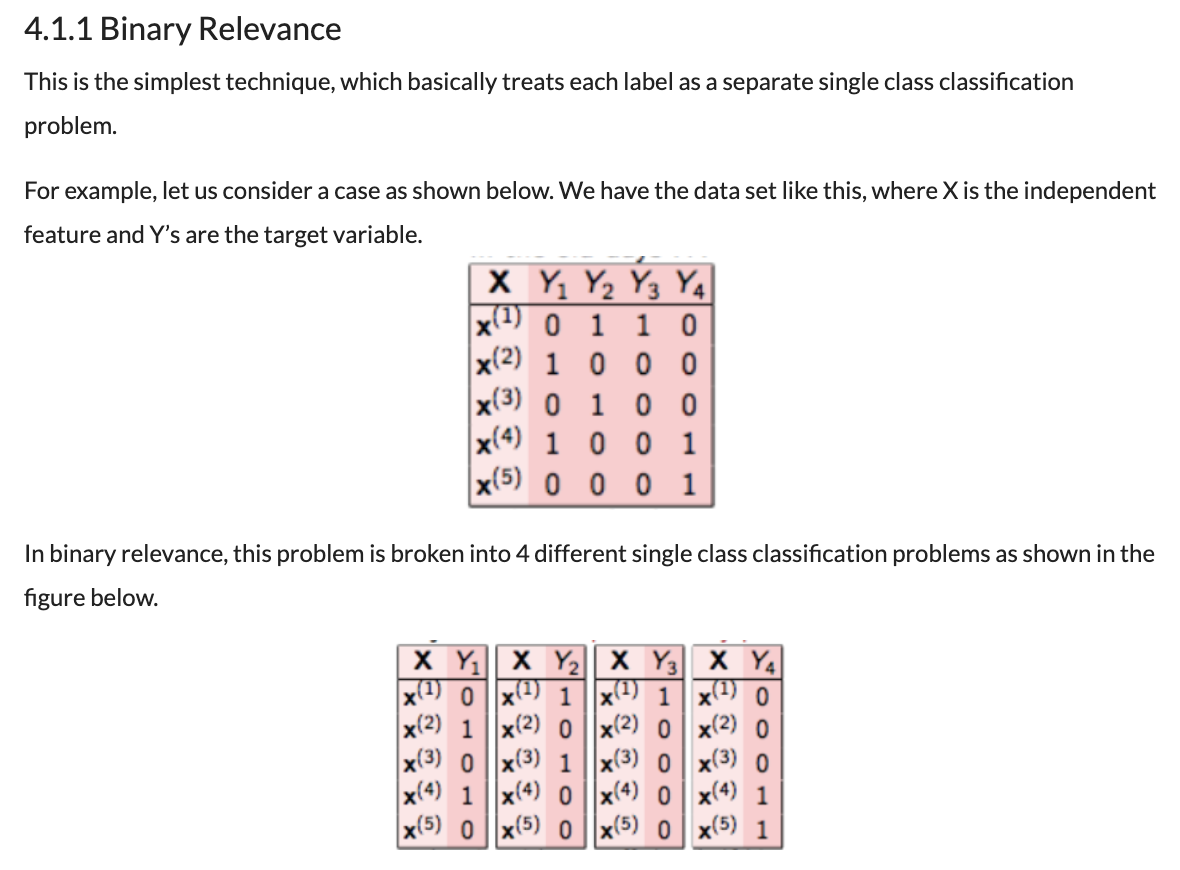

 2. Classifier Chains

 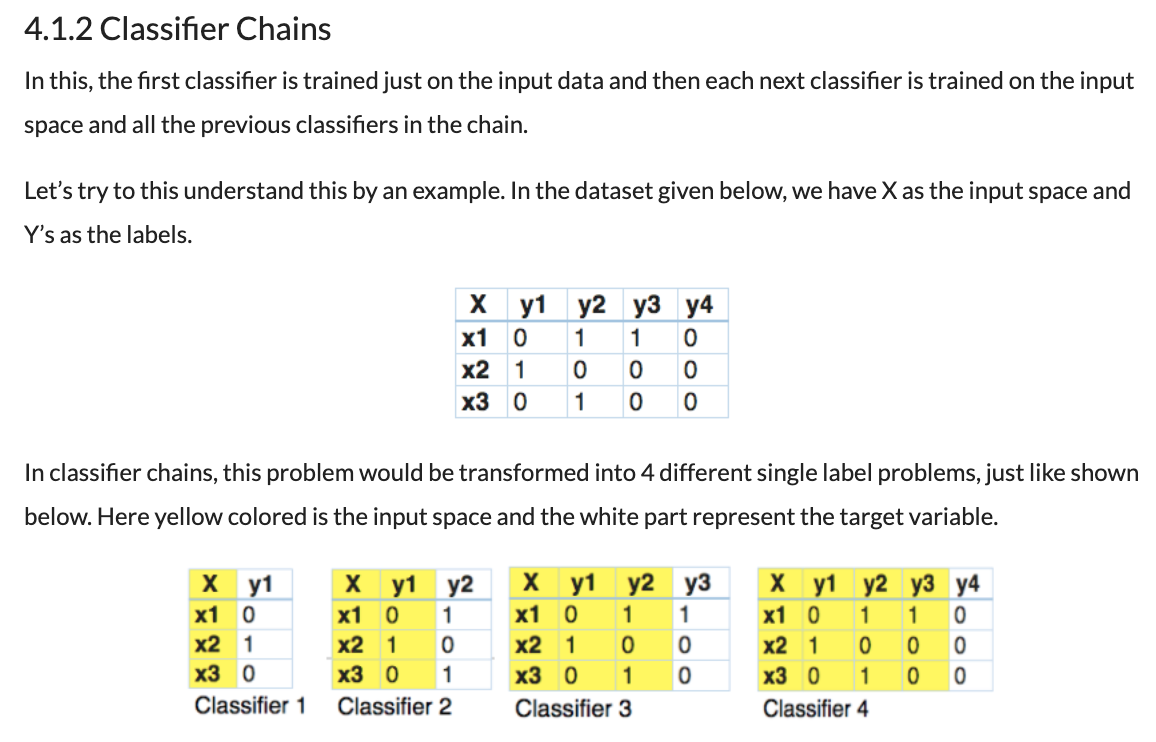

 3. Label Powerset

 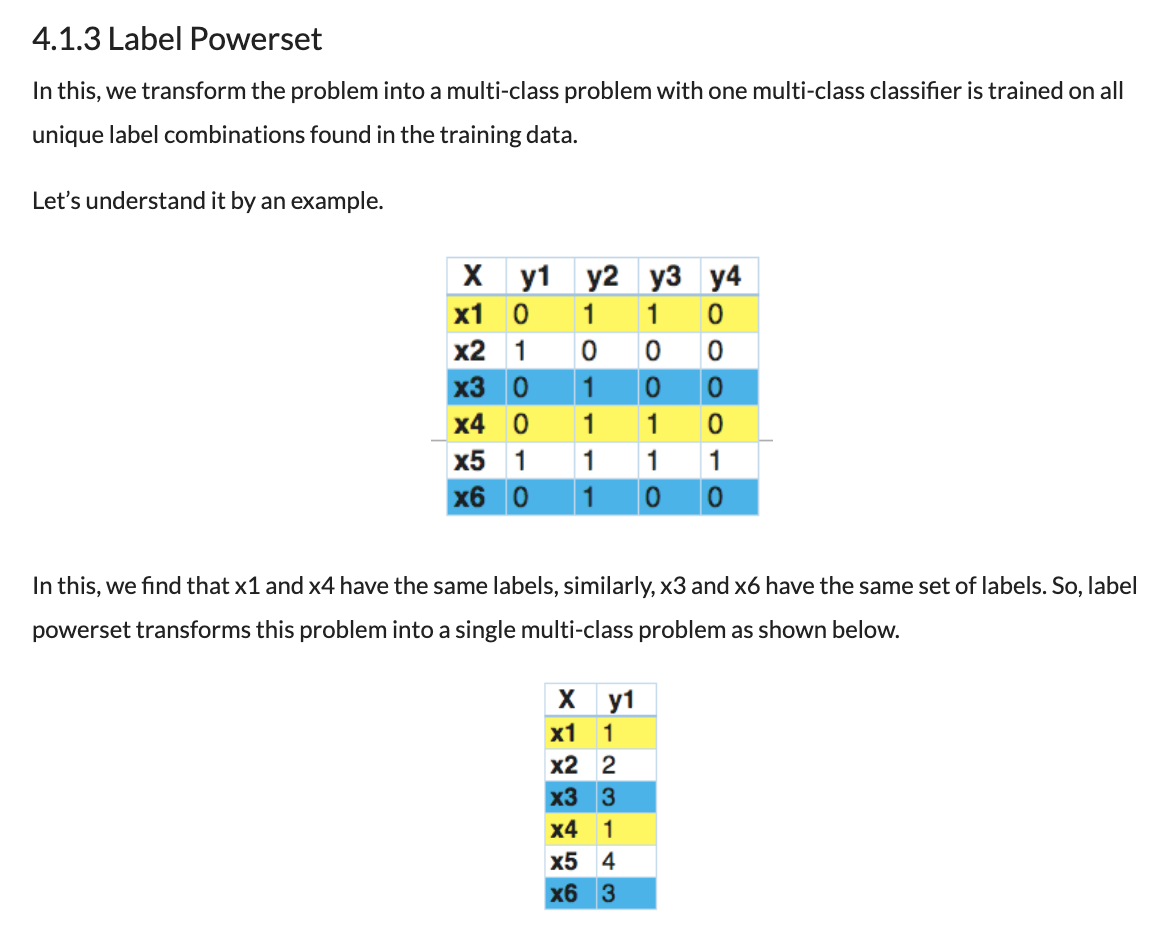

Pictures taken from 
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

## First preprocess the data using tfidf 

In [17]:
# initialize and fit the tf-idf on the given independent feature
tfidf = TfidfVectorizer(stop_words = 'english',lowercase = True, max_features=3000)
tfidf.fit(X)

TfidfVectorizer(max_features=3000, stop_words='english')

In [18]:
# split the data to training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# transform the data
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Use TFIDF vectorized data with Binary Relevance, Classifier Chain and Label Powerset

In [20]:
# initialize binaryrelevance multi-label with a logistic regression classifier
classifier_br = BinaryRelevance(LogisticRegression())

# training
classifier_br.fit(X_train_tfidf, Y_train)

# predicting the output of test data
predictions_br = classifier_br.predict(X_test_tfidf)

In [21]:
predictions_br.toarray()

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [22]:
acc_br = accuracy_score(Y_test,predictions_br)
ham_br = hamming_loss(Y_test,predictions_br)
print(f"accuracy:--> {acc_br},hamming_score:--> {ham_br}")

accuracy:--> 0.48135593220338985,hamming_score:--> 0.12146892655367232


In [23]:
# initialize ClassifierChain multi-label with a logistic regression classifier
classifier_cc = ClassifierChain(LogisticRegression())

# Training 
classifier_cc.fit(X_train_tfidf, Y_train)

# predicting the output of test data
predictions_cc = classifier_cc.predict(X_test_tfidf)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
predictions_cc.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [25]:
acc_cc = accuracy_score(Y_test,predictions_cc)
ham_cc = hamming_loss(Y_test,predictions_cc)
print(f"accuracy:--> {acc_cc},hamming_score:--> {ham_cc}")

accuracy:--> 0.49738058551617875,hamming_score:--> 0.1243965074473549


In [26]:
# initialize LabelPowerset multi-label classifier with a logistic regression classifier
classifier_lp = LabelPowerset(LogisticRegression())

# training
classifier_lp.fit(X_train_tfidf, Y_train)

# predicting the output of test data
predictions_lp = classifier_lp.predict(X_test_tfidf)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
predictions_lp.toarray()

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [28]:
acc_lp = accuracy_score(Y_test,predictions_lp)
ham_lp = hamming_loss(Y_test,predictions_lp)
print(f"accuracy:--> {acc_lp},hamming_score:--> {ham_lp}")

accuracy:--> 0.48043143297380586,hamming_score:--> 0.13281972265023112


## Now, preprocess the data with Countvectorizer

In [29]:
# initialize and fit the countvectorizer on the given independent feature
cv = CountVectorizer(stop_words = 'english',lowercase = True, max_features=3000)
cv.fit(X)

CountVectorizer(max_features=3000, stop_words='english')

In [30]:
# split the data to training and testing data
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
# transform the data
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

## Use CountVector vectorized data with Binary Relevance, Classifier Chain and Label Powerset

In [32]:
# initialize binaryrelevance multi-label with a logistic regression classifier
classifier_br_cv = BinaryRelevance(LogisticRegression())

# training
classifier_br_cv.fit(X_train_cv, Y_train)

# predicting the output of test data
predictions_br_cv = classifier_br_cv.predict(X_test_cv)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [33]:
predictions_br_cv.toarray()

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0]])

In [34]:
acc_br_cv = accuracy_score(Y_test,predictions_br_cv)
ham_br_cv = hamming_loss(Y_test,predictions_br_cv)
print(f"accuracy:--> {acc_br_cv},hamming_score:--> {ham_br_cv}")

accuracy:--> 0.4345146379044684,hamming_score:--> 0.13281972265023112


In [35]:
# initialize ClassifierChain multi-label with a logistic regression classifier
classifier_cc_cv = ClassifierChain(LogisticRegression())

# Training 
classifier_cc_cv.fit(X_train_cv, Y_train)

# predicting the output of test data
predictions_cc_cv = classifier_cc_cv.predict(X_test_cv)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [36]:
predictions_cc_cv.toarray()

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0]])

In [37]:
acc_cc_cv = accuracy_score(Y_test,predictions_cc_cv)
ham_cc_cv = hamming_loss(Y_test,predictions_cc_cv)
print(f"accuracy:--> {acc_cc_cv},hamming_score:--> {ham_cc_cv}")

accuracy:--> 0.4597842835130971,hamming_score:--> 0.1324601951720596


In [38]:
# initialize LabelPowerset multi-label classifier with a logistic regression classifier
classifier_lp_cv = LabelPowerset(LogisticRegression())

# training
classifier_lp_cv.fit(X_train_cv, Y_train)

# predicting the output of test data
predictions_lp_cv = classifier_lp_cv.predict(X_test_cv)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
predictions_lp_cv.toarray()

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [40]:
acc_lp_cv = accuracy_score(Y_test,predictions_lp_cv)
ham_lp_cv = hamming_loss(Y_test,predictions_lp_cv)
print(f"accuracy:--> {acc_lp_cv},hamming_score:--> {ham_lp_cv}")

accuracy:--> 0.4727272727272727,hamming_score:--> 0.13061119671289162
